# Partie 1 : Prétraitement et visualisation des données


### Importation de bibliothèques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
import plotly.colors as color
import joblib
import seaborn as sns
import pickle
import warnings





### Collecte de données

In [ ]:
!unzip /content/store-sales-time-series-forecasting.zip -d extracted_files/

Archive:  /content/store-sales-time-series-forecasting.zip
  inflating: extracted_files/holidays_events.csv  
  inflating: extracted_files/oil.csv  
  inflating: extracted_files/sample_submission.csv  
  inflating: extracted_files/stores.csv  
  inflating: extracted_files/test.csv  
  inflating: extracted_files/train.csv  
  inflating: extracted_files/transactions.csv  


In [ ]:
oil = pd.read_csv('/content/extracted_files/oil.csv')
holidays = pd.read_csv('/content/extracted_files/holidays_events.csv')
stores = pd.read_csv('/content/extracted_files/stores.csv')
train = pd.read_csv('/content/extracted_files/train.csv')
test = pd.read_csv('/content/extracted_files/test.csv')
transactions = pd.read_csv('/content/extracted_files/transactions.csv')

### Aperçu du jeu de données


In [ ]:
import pandas as pd

# Define the filenames for each table
table_files = {
    'holidays': '/content/extracted_files/holidays_events.csv',
    'oil': '/content/extracted_files/oil.csv',
    'train': '/content/extracted_files/train.csv',
    'test': '/content/extracted_files/test.csv',
    'stores': '/content/extracted_files/stores.csv'
}

# Iterate over the table files and print their shapes
for table_name, file_name in table_files.items():
    try:
        df = pd.read_csv(file_name)
        shape = df.shape
        print(f"Table '{table_name}' has shape: {shape}")
    except FileNotFoundError:
        print(f"Table '{table_name}' not found.")


Table 'holidays' has shape: (350, 6)
Table 'oil' has shape: (1218, 2)
Table 'train' has shape: (3000888, 6)
Table 'test' has shape: (28512, 5)
Table 'stores' has shape: (54, 5)


In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0






### Vérification des valeurs en double

In [ ]:
for table_name, file_name in table_files.items():
    try:
        df = pd.read_csv(file_name)
        duplicate_counts = df.duplicated().sum()
        print(f"Table '{table_name}' has {duplicate_counts} duplicated values.")
        print("\n")
    except FileNotFoundError:
        print(f"Table '{table_name}' not found.")

Table 'holidays' has 0 duplicated values.


Table 'oil' has 0 duplicated values.


Table 'train' has 0 duplicated values.


Table 'test' has 0 duplicated values.


Table 'stores' has 0 duplicated values.











### Vérification des valeurs nulles.

In [ ]:
for table_name, file_name in table_files.items():
    try:
        df = pd.read_csv(file_name)
        null_counts = df.isnull().sum()
        print(f"Table '{table_name}' has null value counts:")
        print(null_counts)
        print("\n")
    except FileNotFoundError:
        print(f"Table '{table_name}' not found.")

Table 'holidays' has null value counts:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


Table 'oil' has null value counts:
date           0
dcoilwtico    43
dtype: int64


Table 'train' has null value counts:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


Table 'test' has null value counts:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


Table 'stores' has null value counts:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64








### Vérification des valeurs manquantes

In [ ]:
for table_name, file_name in table_files.items():
    try:
        df = pd.read_csv(file_name)
        null_counts = df.isna().sum()
        print(f"Table '{table_name}' has missing value counts:")
        print(null_counts)
        print("\n")
    except FileNotFoundError:
        print(f"Table '{table_name}' not found.")

Table 'holidays' has missing value counts:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


Table 'oil' has missing value counts:
date           0
dcoilwtico    43
dtype: int64


Table 'train' has missing value counts:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


Table 'test' has missing value counts:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


Table 'stores' has missing value counts:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64





 ### Conversion de la colonne de dates de chaîne de caractères en type datetime
+  Il est important de trier les données dans l'ordre croissant en fonction des dates. Cela garantit que le modèle utilise les données historiques dans l'ordre chronologique.




In [ ]:
holidays['date'] = pd.to_datetime(holidays['date'])
oil['date'] = pd.to_datetime(oil['date'])
train['date'] = pd.to_datetime(train['date'])

### Interpolation des valeurs manquantes du prix du pétrole

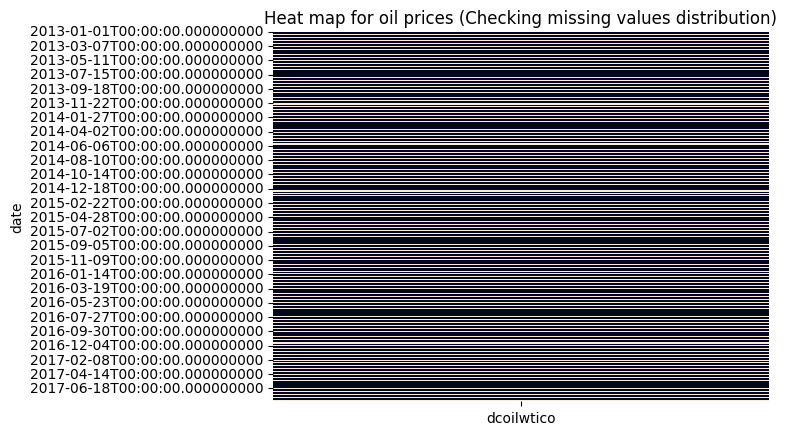

In [ ]:
# Create the heatmap figure using seaborn
dates = pd.DataFrame(train.date.unique(), columns=['date'])
dates['date'] = pd.to_datetime(dates['date'])
oil = pd.merge(dates, oil, how="left", on=['date'])
oil = oil.set_index('date')

fig = sns.heatmap(oil.isna(), cbar=False)
fig.set_title("Heat map for oil prices (Checking missing values distribution)")
plt.show()

In [ ]:

oil= oil.dcoilwtico.interpolate(method='linear')





### Tracé d'un curseur pour les prix du pétrole

In [ ]:

fig = px.line(oil, x = oil.index, y ='dcoilwtico', title='Plot slider for oil prices')
fig.update_xaxes(
    rangeslider_visible = True

)
fig.update_xaxes(rangeslider_visible=True, range=['2013-01-01', '2017-08-31'])  # Ajustez la plage de dates selon vos besoins


fig.show()

### Fusion des jeux de données

In [ ]:
train = pd.merge(train, oil, how="left", on=['date'])
train = pd.merge(train, stores, how='left',on='store_nbr')

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,93.14


In [ ]:
train = pd.merge(train, stores, how='left',on='store_nbr')
train.tail()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,47.57,Quito,Pichincha,B,6


### Tracé les ventes au fil du temps

In [ ]:
grouped = train.groupby(['date']).agg({'dcoilwtico': 'mean', 'sales': 'mean'})
fig = px.line(grouped, x=grouped.index , y=['sales', 'dcoilwtico'])
fig.update_layout(title='Sale and Date Plot')
fig.show()
del grouped

 + Nous pouvons clairement observer qu'à mesure que les prix du pétrole baissent, les ventes augmentent. Par conséquent, il est nécessaire pour nous d'incorporer cela comme une caractéristique (feature) pour les prévisions futures.


### Graphique des ventes totales par famille de produits

In [ ]:
# Group the DataFrame by 'family' and calculate the sum of 'sales'
grouped_data = train.groupby('family').sales.sum().reset_index()
grouped_data = grouped_data.sort_values('sales', ascending=False)

# Create the bar plot using Plotly Express
fig = px.bar(grouped_data, x='family', y='sales', orientation='v')
fig.show()

### Ventes totales par catégorie de produits

In [ ]:

grouped_data = train.groupby('store_nbr')[['onpromotion', 'sales']].sum().reset_index()
fig6 = px.scatter(grouped_data, x='onpromotion', y='sales', title='Promotion and Sales Relationship')
fig6.show()

### Graphique des promotions par catégorie de produits

<ipython-input-50-5949d879e259>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-5949d879e259>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



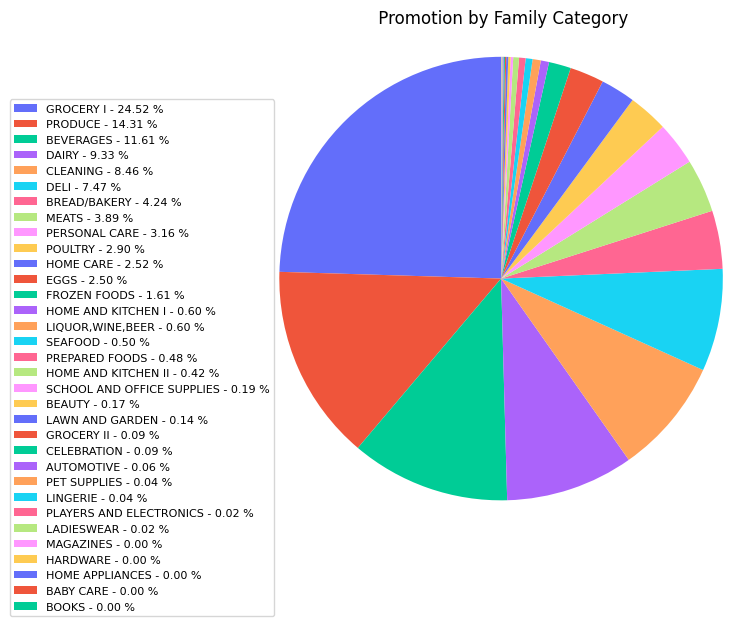

In [ ]:
import matplotlib.pyplot as plt
import plotly.colors as colors
# pie d promotion en fct dyal categories

# Calculate the mean sales and on promotion for each family category
data_grouped_family_types = train.groupby('family')[['sales', 'onpromotion']].mean().reset_index()

# Sort the data by mean on promotion in descending order
data_grouped_family_types.sort_values('onpromotion', ascending=False, inplace=True)

# Get the top 33 categories
top_33_family_types = data_grouped_family_types.head(33)

# Calculate the percentage
total_onpromotion = top_33_family_types['onpromotion'].sum()
top_33_family_types['%_p'] = 100 * top_33_family_types['onpromotion'] / total_onpromotion
top_33_family_types['%_p'] = top_33_family_types['%_p'].round(decimals=3)

# Get the labels and percentages
labels = top_33_family_types['family']
percentages = top_33_family_types['%_p']

# Get a list of 33 distinct colors from Plotly's colorscale
color_palette = color.qualitative.Plotly[:33]

# Create the pie chart
fig5, ax = plt.subplots()
ax.pie(percentages, startangle=90, radius=1.5, colors=color_palette)

# Set labels for the pie slices
labels_with_percentages = ['{0} - {1:1.2f} %'.format(label, percentage) for label, percentage in zip(labels, percentages)]
ax.legend(labels_with_percentages, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.title(" Promotion by Family Category\n\n\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.show()

### Prétraitement de la table des jours fériés

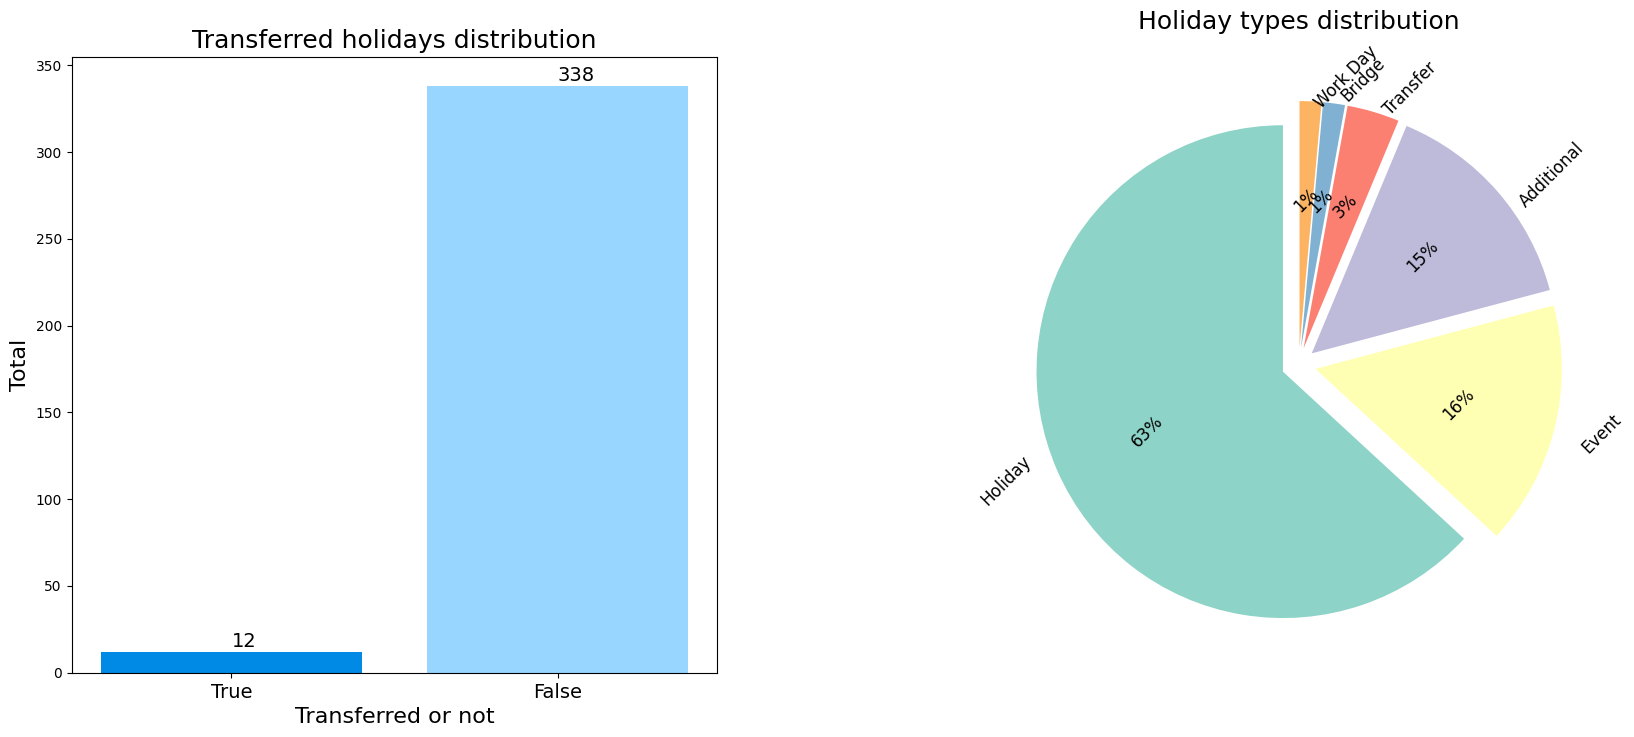

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_transferred_holidays(holidays):
    holiday_type = dict(holidays["type"].value_counts())

    transferred = holidays["transferred"].value_counts()
    transferred_dict = {"True": transferred[True], "False": transferred[False]}

    plt.figure(figsize=(20, 8))
    left = plt.subplot(1, 2, 1)
    plt.bar(x=transferred_dict.keys(), height=transferred_dict.values(), color=["#008ae6", "#99d6ff"])
    for key in transferred_dict.keys():
        plt.annotate(f"{transferred_dict[key]}", (key, transferred_dict[key] + 3), size=14)
    plt.xticks(size=14)
    left.set_title("Transferred holidays distribution", size=18)
    left.set_xlabel("Transferred or not", size=16)
    left.set_ylabel("Total", size=16)

    right = plt.subplot(1, 2, 2)
    holiday_labels = list(holiday_type.keys())
    holiday_counts = list(holiday_type.values())
    colors = plt.cm.Set3(range(len(holiday_labels)))  # Use a colormap for multiple colors
    explode = [0.07] * len(holiday_type)  # Explode slices for emphasis

    patches, text, autotexts = plt.pie(holiday_counts, labels=holiday_labels, colors=colors, autopct='%1.0f%%', startangle=90, explode=explode, textprops={'fontsize': 12})

    for t in text:
        t.set_rotation(45)  # Rotate labels by 45 degrees

    for at in autotexts:
        at.set_rotation(45)  # Rotate percentages by 45 degrees

    right.set_title("Holiday types distribution", size=18, pad=20)  # Increase pad value for more space

    plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots

    plt.show()

holidays = pd.read_csv('/content/extracted_files/holidays_events.csv')
plot_transferred_holidays(holidays.copy())



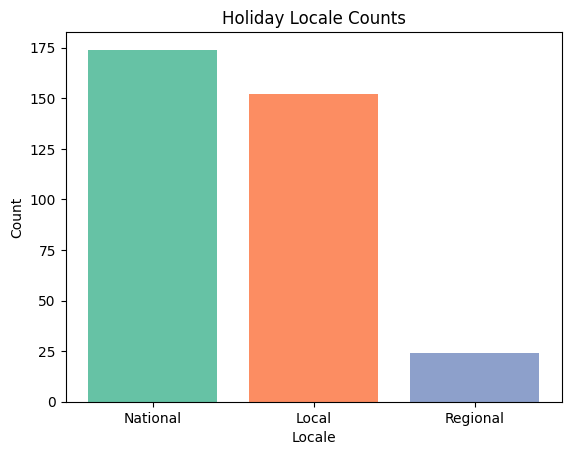

In [ ]:
holiday_locale = dict(holidays["locale"].value_counts())

colors = sns.color_palette("Set2", len(holiday_locale))

# Create the bar plot with the seaborn color palette
plt.bar(x=list(holiday_locale.keys()), height=list(holiday_locale.values()), color=colors)

# Set the plot title and axis labels
plt.title('Holiday Locale Counts')
plt.xlabel('Locale')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
#Deleting holidays that had been moved from its original date.

holidays = holidays[holidays['transferred'] == False].copy()

#Dropping the holidays description column as it has no impact and the transferred column since it contains only one value now.
holidays.drop(['transferred', 'description'], axis=1, inplace=True)

#Adding a new column to indicate only whether the sales declared in each row were made on a national holiday or not.
national_holidays = holidays[holidays['locale'] == 'National'].copy()
national_holidays['national_holiday_type'] = national_holidays['type']
national_holidays.drop(['locale', 'locale_name', 'type'], axis=1, inplace=True)
national_holidays.drop_duplicates(subset='date', keep="first", inplace=True)
national_holidays['date'] = pd.to_datetime(national_holidays['date'])
train = pd.merge(train, national_holidays, how='left', on=['date'])

#Adding a new column to indicate only whether the sales declared in each row were made on a state holiday(the state where the shope locates ) or not.
state_holidays = holidays[holidays['locale'] == 'Regional'].copy()
state_holidays['state'] = state_holidays['locale_name']
state_holidays['state_holiday_type'] = state_holidays['type']
state_holidays.drop(['locale', 'locale_name', 'type'], axis=1, inplace=True)
state_holidays['date'] = pd.to_datetime(state_holidays['date'])
train = pd.merge(train, state_holidays, how='left', on=['date', 'state'])

#Adding a new column to indicate only whether the sales declared in each row were made on a local holiday(the city where the shope locates ) or not.
city_holidays = holidays[holidays['locale'] == 'Local'].copy()
city_holidays['city'] = city_holidays['locale_name']
city_holidays['city_holiday_type'] = city_holidays['type']
city_holidays.drop(['locale', 'locale_name', 'type'], axis=1, inplace=True)
city_holidays.drop([265], axis=0, inplace=True)
city_holidays['date'] = pd.to_datetime(city_holidays['date'])
train = pd.merge(train, city_holidays, how='left', on=['date', 'city'])


train.head(1000)

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,national_holiday_type,state_holiday_type,city_holiday_type
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2013-01-01,37,BREAD/BAKERY,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,NaN,NaN
996,996,2013-01-01,37,CELEBRATION,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,NaN,NaN
997,997,2013-01-01,37,CLEANING,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,NaN,NaN
998,998,2013-01-01,37,DAIRY,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,NaN,NaN


### Suppression des colonnes inutiles

In [ ]:
train.drop(['city','state','type','id'], axis=1, inplace=True)
train.head()


,date,store_nbr,family,sales,onpromotion,dcoilwtico,cluster,national_holiday_type,state_holiday_type,city_holiday_type
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,13,Holiday,NaN,NaN
1,2013-01-01,1,BABY CARE,0.0,0,93.14,13,Holiday,NaN,NaN
2,2013-01-01,1,BEAUTY,0.0,0,93.14,13,Holiday,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,13,Holiday,NaN,NaN
4,2013-01-01,1,BOOKS,0.0,0,93.14,13,Holiday,NaN,NaN


### Vérification des valeurs manquantes dans le DataFrame fusionné

<Axes: >

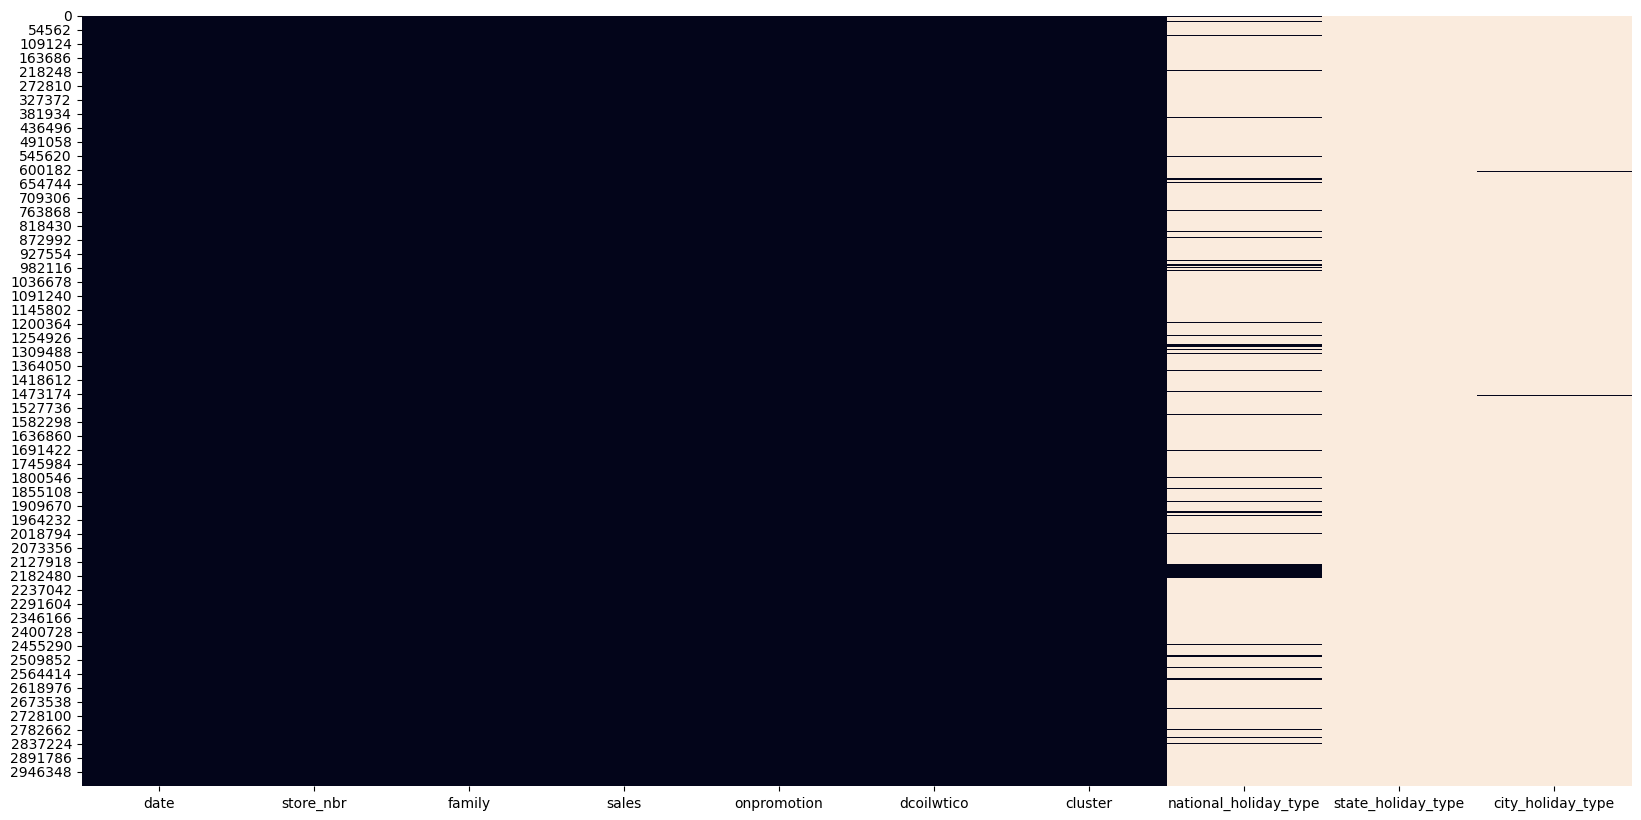

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train.isna(), cbar=False)



*   Nous remplaçons les valeurs manquantes des jours fériés par une chaîne de caractères vide.

In [ ]:
train.fillna('', inplace=True)
train.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,cluster,national_holiday_type,state_holiday_type,city_holiday_type
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,13,Holiday,,
1,2013-01-01,1,BABY CARE,0.0,0,93.14,13,Holiday,,
2,2013-01-01,1,BEAUTY,0.0,0,93.14,13,Holiday,,
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,13,Holiday,,
4,2013-01-01,1,BOOKS,0.0,0,93.14,13,Holiday,,


### Encodage des caractéristiques (features)



Le jeu de données comprend les caractéristiques catégorielles suivantes qui nécessitent un encodage des caractéristiques :
+ family.
+ national_holiday_type.
+ state_holiday_type.
+ city_holiday_type.



In [ ]:
train = train.set_index('date')
train.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,cluster,national_holiday_type,state_holiday_type,city_holiday_type
date,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,13,Holiday,,
2013-01-01,1,BABY CARE,0.0,0,93.14,13,Holiday,,
2013-01-01,1,BEAUTY,0.0,0,93.14,13,Holiday,,
2013-01-01,1,BEVERAGES,0.0,0,93.14,13,Holiday,,
2013-01-01,1,BOOKS,0.0,0,93.14,13,Holiday,,


In [ ]:
ordinal_encoder = OrdinalEncoder(dtype=int)
train[['family']] = ordinal_encoder.fit_transform(train[['family']])
train[['national_holiday_type']] = ordinal_encoder.fit_transform(train[['national_holiday_type']])
train[['state_holiday_type']] = ordinal_encoder.fit_transform(train[['state_holiday_type']])
train[['city_holiday_type']] = ordinal_encoder.fit_transform(train[['city_holiday_type']])

### Création de caractéristiques de séries temporelles

In [ ]:
def create_time_series_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['weekofyear'] = df.index.isocalendar().week
    df['dayofyear'] = df.index.dayofyear
    return df
train_df = create_time_series_features(train)

In [ ]:
train_df.tail()

,store_nbr,family,sales,onpromotion,dcoilwtico,cluster,national_holiday_type,state_holiday_type,city_holiday_type,quarter,month,year,weekofyear,dayofyear
date,,,,,,,,,,,,,,
2017-08-15,9,28,438.133,0,47.57,6,0,0,0,3,8,2017,33,227
2017-08-15,9,29,154.553,1,47.57,6,0,0,0,3,8,2017,33,227
2017-08-15,9,30,2419.729,148,47.57,6,0,0,0,3,8,2017,33,227
2017-08-15,9,31,121.000,8,47.57,6,0,0,0,3,8,2017,33,227
2017-08-15,9,32,16.000,0,47.57,6,0,0,0,3,8,2017,33,227


### Graphique des ventes moyennes les jours normaux par rapport aux jours fériés

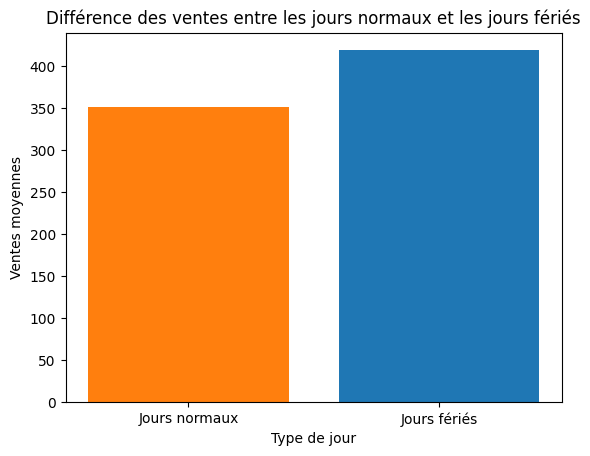

In [ ]:

masque_jours_normaux = (train_df['national_holiday_type'] == 0) & \
                       (train_df['state_holiday_type'] == 0) & \
                       (train_df['city_holiday_type'] == 0)

ventes_jours_normaux = train_df.loc[masque_jours_normaux, 'sales']

ventes_jours_feries = train_df.loc[~masque_jours_normaux, 'sales']

categories = ['Jours normaux', 'Jours fériés']
ventes_moyennes = [ventes_jours_normaux.mean(), ventes_jours_feries.mean()]

couleurs = ['#ff7f0e', '#1f77b4']

plt.bar(categories, ventes_moyennes, color=couleurs)
plt.xlabel('Type de jour')
plt.ylabel('Ventes moyennes')
plt.title('Différence des ventes entre les jours normaux et les jours fériés')
plt.show()




# Partie 2 : Construction d'un modèle XGBoost pour prédire les ventes futures.



### Partition du jeu de données en un ensemble d'entraînement et un ensemble de test


In [ ]:
FEATURES = ['family', 'store_nbr', 'onpromotion', 'dcoilwtico', 'cluster',
                'national_holiday_type','state_holiday_type','city_holiday_type',
                'quarter' ,'month', 'year', 'dayofyear']
TARGET = 'sales'
train = train_df.loc[train_df.index < '02-01-2017'] # 90% of the dataset
test = train_df.loc[train_df.index >= '02-01-2017']# 1o% of the dataset
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


### Construction et évaluation du modèle sur l'ensemble de test

In [ ]:

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=4000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train)
y_pred_xgbR = reg.predict(X_test)

print(f"Xgboost Regressor Score\n\n r squared: {r2_score(y_test, y_pred_xgbR)}\n\n RMSE: {mean_squared_error(y_test, y_pred_xgbR, squared=False)}")

Xgboost Regressor Score

 r squared: 0.9463684307652872

 RMSE: 298.35145564295937




*   The model with Xgboost Regressor is 94.63% accuarate.








### Graphique des ventes prédites par rapport aux ventes réelles pour vérifier l'exactitude du modèle

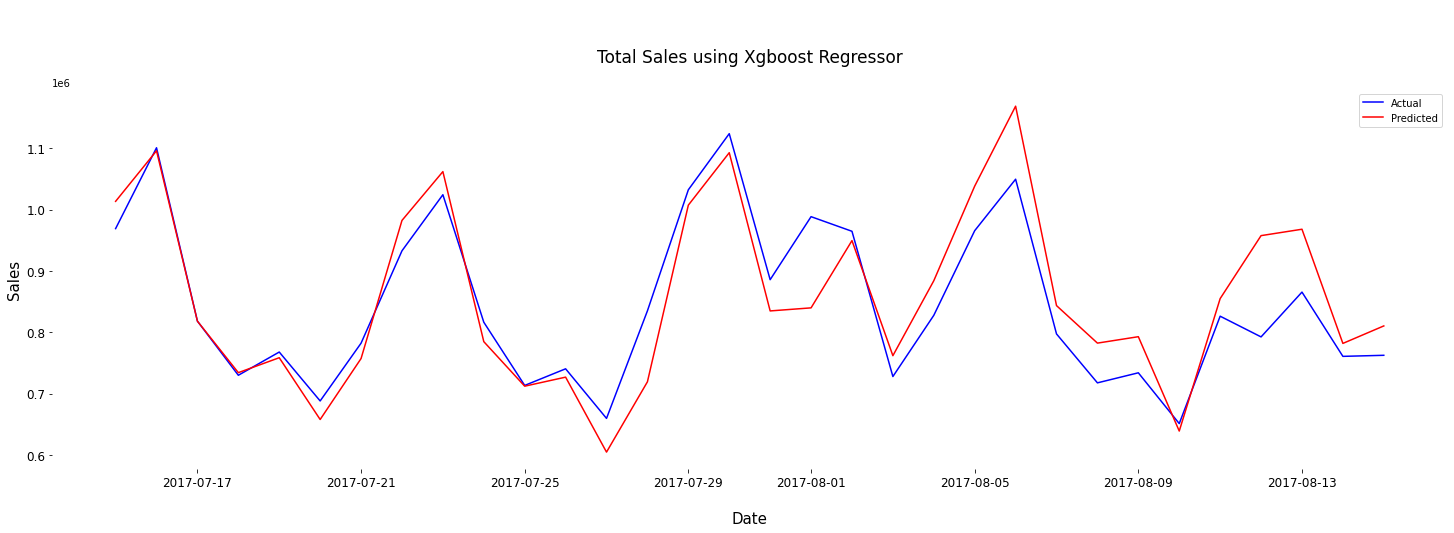

In [ ]:
def plot_sales_total_predicted(testing):
    testing_with_pred = testing.copy()
    testing_with_pred["sales_pred"] = y_pred_xgbR

    testing_with_pred = testing_with_pred.groupby("date").sum()

    plt.figure(figsize=(25,7))
    act = plt.plot(testing_with_pred.index, testing_with_pred["sales"], color="blue")
    pred = plt.plot(testing_with_pred.index, testing_with_pred["sales_pred"], color="red")

    plt.xlabel("\nDate", size=15)
    plt.ylabel("Sales", size=15)

    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.title(f"\n\nTotal Sales using Xgboost Regressor\n", size=17)
    plt.legend(["Actual","Predicted"])
    plt.box(False)

plot_sales_total_predicted(test())

# Partie 3 : Prédiction des ventes pour les 15 prochains jours




### Réentrainement du modèle sur l'ensemble complet des données

In [ ]:

FEATURES = ['family', 'store_nbr', 'onpromotion', 'dcoilwtico', 'cluster',
                'national_holiday_type','state_holiday_type','city_holiday_type',
                'quarter' ,'month', 'year', 'dayofyear']
TARGET = 'sales'

X_all = train_df[FEATURES]
y_all = train_df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=4000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

### Enregistrement du modèle pour pouvoir l'utiliser dans l'interface.
Lien vers l'interface graphique : https://projet-metier.streamlit.app/

In [ ]:
import joblib

joblib.dump(reg, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
xgb_model = joblib.load('xgb_model.pkl')